<a href="https://colab.research.google.com/github/gkv856/KaggleData/blob/main/S1_prepare_embedding_model_AutoVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description


1.   This notebook is part1 of Auto voice cloning (AVC) project
2.   In this notebook we will use [this github repo](https://github.com/gkv856/end2end_auto_voice_conversion)
3.   First we will create mel-spectrogram from the raw audio
4.   Then we will train Embedding model using GE2E loss
5.   Then we will test the model

* [How to create embedding model using 'Generalized End-to-End Loss for Speaker Verification' 
(GE2E)](https://github.com/gkv856/KaggleData/blob/main/S1_prepare_embedding_model_AutoVC.ipynb)
* [Paper used](https://arxiv.org/abs/1710.10467)


# Installing dependencies

In [1]:
pip install webrtcvad

     |████████████████████████████████| 66 kB 1.8 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72349 sha256=5179ea22b589d112d31cee0e1f7c702b1109a1d397ce4b4013d5f8e5b905653e
  Stored in directory: /root/.cache/pip/wheels/11/f9/67/a3158d131f57e1c0a7d8d966a707d4a2fb27567a4fe47723ad
Successfully built webrtcvad


# Clone the git repository

In [2]:
!git clone https://github.com/gkv856/end2end_auto_voice_conversion.git

Cloning into 'end2end_auto_voice_conversion'...
remote: Enumerating objects: 516, done.
remote: Counting objects: 100% (516/516), done.
remote: Compressing objects: 100% (384/384), done.
remote: Total 516 (delta 160), reused 453 (delta 97), pack-reused 0
Receiving objects: 100% (516/516), 44.40 MiB | 30.51 MiB/s, done.
Resolving deltas: 100% (160/160), done.


In [3]:
!mv end2end_auto_voice_conversion AVC

# ACTION REQUIRED:
**Rename the downloaded folder from "end2end_auto_voice_conversion" to "AVC"**

# Couple of manual changes
1. Double click and open 'constants.py' file located at '/content/AVC/strings/constants.py'
2. Change line 6 from 'from utils.dict_to_dot import GetDictWithDotNotation' to: "from AVC.utils.dict_to_dot import GetDictWithDotNotation' as mentioned above, we need to this for every package not found error
3. Change line 8 to: PROJECT_NAME = "AVC"
4. Change line 10 to: current_dir = Path("/content/AVC/strings/constants.py")

In [4]:
from AVC.strings.constants import hp

Device type available = 'cuda:0'


# Create mel-spectrogram from raw data

In [5]:
from AVC.s1_data_prep.audio_to_spectrogram import CreateSpectrogram
from AVC.s2_generalized_end2end_loss_GE2E.s4_train_embed_model import TrainEmbedModel

In [6]:
# dataset1
cr_obj = CreateSpectrogram(hp)
cr_obj.save_spectrogram_tisv()

Spectrograms saved!!


In [7]:
# seconda dataset
hp.raw_audio.raw_audio_path = "/content/AVC/static/raw_data/librispeech_test-other"
# step 1 prepare the spectrogram from the raw audio file
cr_obj = CreateSpectrogram(hp)
cr_obj.save_spectrogram_tisv()

Spectrograms saved!!


# Train the Embedding model using GE2E loss

In [8]:

# step2 of the Auto voice cloning is to: train the embedding model
# to get a user's embedding or 256 dim vector representing user's speaking style

hp.m_ge2e.training_epochs = 1000
hp.m_ge2e.checkpoint_interval = 300
hp.m_ge2e.min_test_loss = 4

hp.m_ge2e.training_N = 4
hp.m_ge2e.training_M = 16

hp.m_ge2e.test_N = 4
hp.m_ge2e.test_M = 16

hp.m_ge2e.lr = 0.05
# creating training object
train_emb_model_obj = TrainEmbedModel(hp)

# training the model
model, train_loss, test_loss = train_emb_model_obj.train_model(lr_reduce=300, 
                                                               epoch_print=100, 
                                                               dot_print=10)
print(2)


Epoch:[100/1000] .......... Train_Loss:21.1389	 Test_Loss:14.4466	00:00:27
Epoch:[200/1000] .......... Train_Loss:4.7296	 Test_Loss:6.1667	00:00:27
Epoch:[300/1000] .......... Train_Loss:6.9533	 Test_Loss:0.5485	00:00:27
Reducing learning rate from 0.05 to 0.025
Model saved as 'ckpt_epoch_300_L_6.9533.pth'
Epoch:[400/1000] .......... Train_Loss:2.7781	 Test_Loss:0.7971	00:00:27
Epoch:[500/1000] .......... Train_Loss:2.2827	 Test_Loss:0.0953	00:00:27
Epoch:[600/1000] .......... Train_Loss:0.0010	 Test_Loss:0.0014	00:00:27
Reducing learning rate from 0.025 to 0.0125
Model saved as 'ckpt_epoch_600_L_0.0010.pth'
Epoch:[700/1000] .......... Train_Loss:0.0630	 Test_Loss:0.0055	00:00:27
Epoch:[800/1000] .......... Train_Loss:0.0003	 Test_Loss:0.0843	00:00:27
Epoch:[900/1000] .......... Train_Loss:0.0387	 Test_Loss:1.7233	00:00:27
Reducing learning rate from 0.0125 to 0.00625
Model saved as 'ckpt_epoch_900_L_0.0387.pth'
Epoch:[1000/1000] .......... Train_Loss:0.0235	 Test_Loss:0.0004	00:00:27


# Load pre-trained weights and test the embedding model

In [11]:
from AVC.s2_generalized_end2end_loss_GE2E.s5_eval_model import calculate_ERR, plot_scatter
from AVC.s2_generalized_end2end_loss_GE2E.s2_model_GE2E_loss_speach_embed import  get_pre_trained_embedding_model

Pre-trained model loaded /content/AVC/static/model_chk_pts/ge2e/m_best_1000_L_0.0004.pth
(4, 8, 4) <class 'numpy.ndarray'> 
 [[[ 0.9942377  -0.6947832  -0.15025748 -0.92806304]
  [ 0.9989447  -0.74752027 -0.27056518 -0.9152334 ]
  [ 0.99885315 -0.74294835 -0.26632383 -0.91449183]
  [ 0.9989447  -0.74752027 -0.27056518 -0.9152334 ]
  [ 0.9980524  -0.7446904  -0.2780355  -0.91306597]
  [ 0.9942377  -0.6947832  -0.15025748 -0.92806304]
  [ 0.9997453  -0.7242967  -0.23408389 -0.9230106 ]
  [ 0.99885315 -0.74294835 -0.26632383 -0.91449183]]

 [[-0.69927603  0.99619997  0.59172827  0.4900873 ]
  [-0.69927603  0.99619997  0.59172827  0.4900873 ]
  [-0.7921365   0.9790534   0.4035728   0.6143369 ]
  [-0.6749583   0.9925278   0.5161118   0.45881003]
  [-0.7285667   0.99865705  0.5720876   0.5274733 ]
  [-0.77283174  0.99458337  0.48131695  0.58653307]
  [-0.7285667   0.99865705  0.5720876   0.5274733 ]
  [-0.7285667   0.99865705  0.5720876   0.5274733 ]]

 [[-0.25101194  0.5192518   0.99775124 

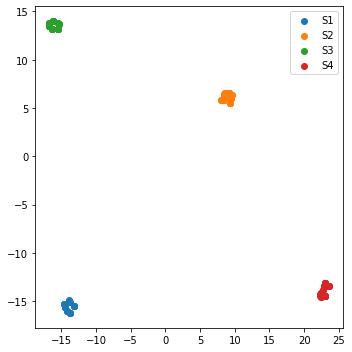

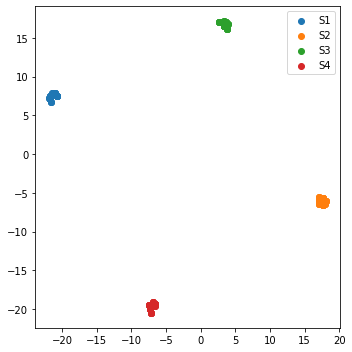

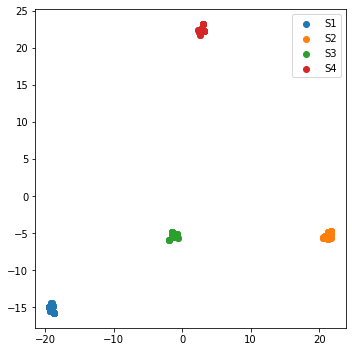

3


In [12]:
# loading a pre-trained model

hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/m_best_1000_L_0.0004.pth"
model = get_pre_trained_embedding_model(hp)

# calculating ERR
calculate_ERR(model, hp, 4, 8)

plot_scatter(model, hp, 4, 32)

print(3)


In [ ]:
#calculating ERR
# calculate_ERR(model, hp, 4, 8)

In [13]:
def plot_scatter_with_diff_spr_nums(model):
  print("\n\nUsing '4' speakers")
  num_speakers = 4
  num_utter = 16
  # plotting speaker embeddings
  plot_scatter(model, hp, num_speakers, num_utter)

  print("\n\nUsing '6' speakers")
  num_speakers = 6
  num_utter = 32
  plot_scatter(model, hp, num_speakers, num_utter)

  print("\n\nUsing '10' speakers")
  num_speakers = 10
  num_utter = 32
  plot_scatter(model, hp, num_speakers, num_utter)
    



Using '4' speakers


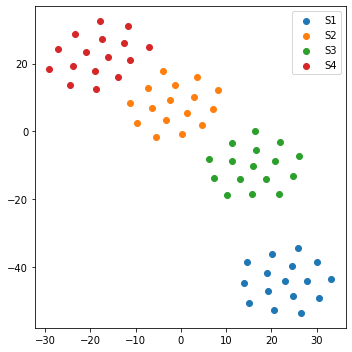

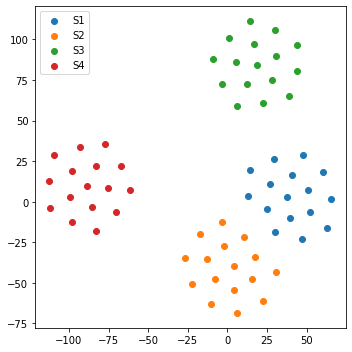

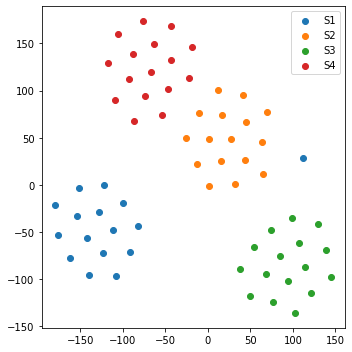



Using '6' speakers


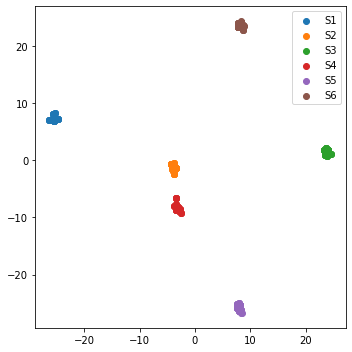

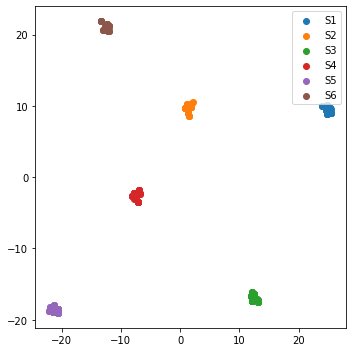



Using '10' speakers


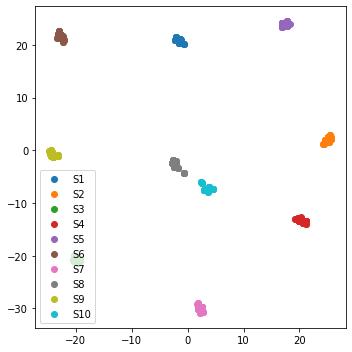

In [14]:
plot_scatter_with_diff_spr_nums(model)

# Embedding model test with Final Epoch weights

Pre-trained model loaded /content/AVC/static/model_chk_pts/ge2e/final_epoch_1000_L_0.0235.pth


Using '4' speakers


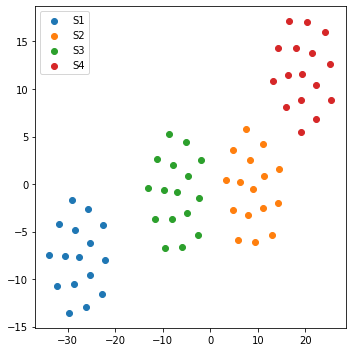

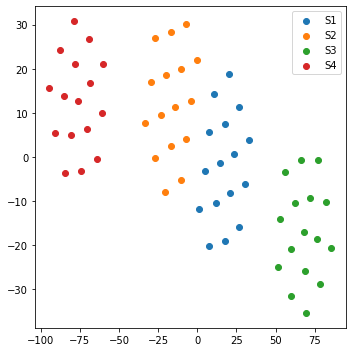

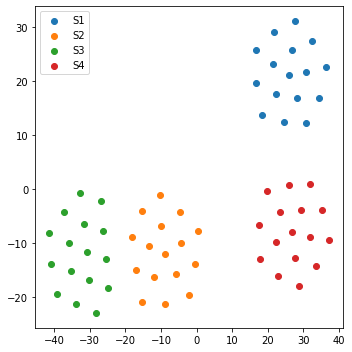



Using '6' speakers


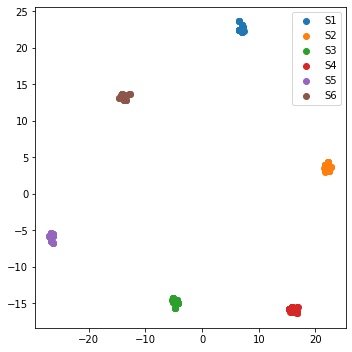

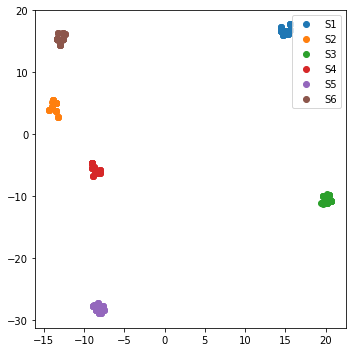



Using '10' speakers


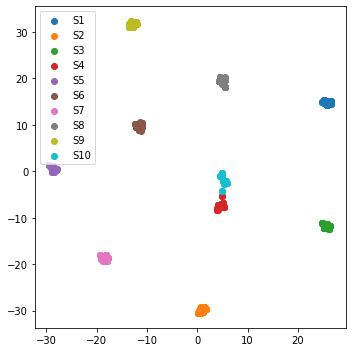

In [16]:
# loading a pre-trained model
hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/final_epoch_1000_L_0.0235.pth"
final_model = get_pre_trained_embedding_model(hp)
plot_scatter_with_diff_spr_nums(final_model)